In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
features=1000
length=500
batch_size=32

In [4]:
(x_tr,y_tr),(x_te,y_te)=imdb.load_data(num_words=features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
len(x_tr)

25000

In [6]:
len(x_te)

25000

In [7]:
len(x_tr[0])

218

In [8]:
x_tr=sequence.pad_sequences(x_tr,maxlen=length)
x_te=sequence.pad_sequences(x_te,maxlen=length)

In [9]:
model = Sequential([
    Embedding(features,32),
    SimpleRNN(32),
    Dense(1,activation="sigmoid")
])

In [10]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [11]:
model.fit(x_tr,y_tr,epochs=10,batch_size=batch_size,validation_data=(x_te,y_te))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 108s 134ms/step - accuracy: 0.5869 - loss: 0.6549 - val_accuracy: 0.5985 - val_loss: 0.6791
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 150ms/step - accuracy: 0.6577 - loss: 0.6104 - val_accuracy: 0.6569 - val_loss: 0.6403
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 123s 126ms/step - accuracy: 0.7607 - loss: 0.4937 - val_accuracy: 0.7084 - val_loss: 0.5791
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 97s 124ms/step - accuracy: 0.6988 - loss: 0.5657 - val_accuracy: 0.7012 - val_loss: 0.5562
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 106s 136ms/step - accuracy: 0.6816 - loss: 0.6007 - val_accuracy: 0.6008 - val_loss: 0.6439
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 150ms/step - accuracy: 0.6603 - loss: 0.5961 - val_accuracy: 0.6730 - val_loss: 0.5949
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 131ms/step - accuracy: 0.7443 - loss: 0.5128 - val_accuracy: 0.7776 - val_loss: 0.4942
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 108s 138ms/step - accuracy: 0.7740 - 

In [12]:
import matplotlib.pyplot as plt

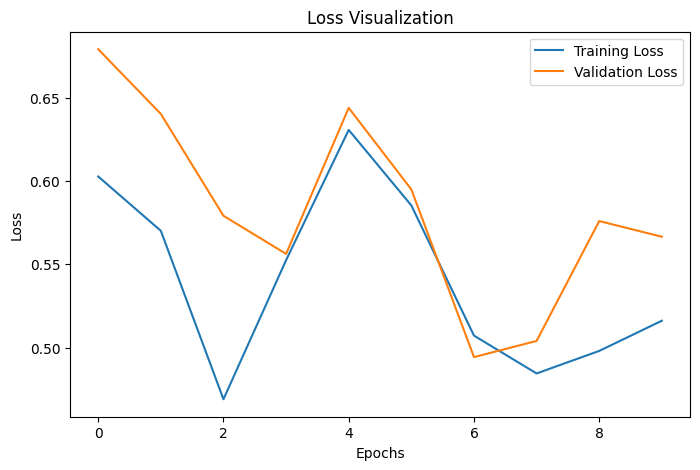

In [13]:
plt.figure(figsize=(8,5))
plt.plot(model.history.history["loss"],label="Training Loss")
plt.plot(model.history.history["val_loss"],label="Validation Loss")
plt.legend()
plt.title("Loss Visualization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

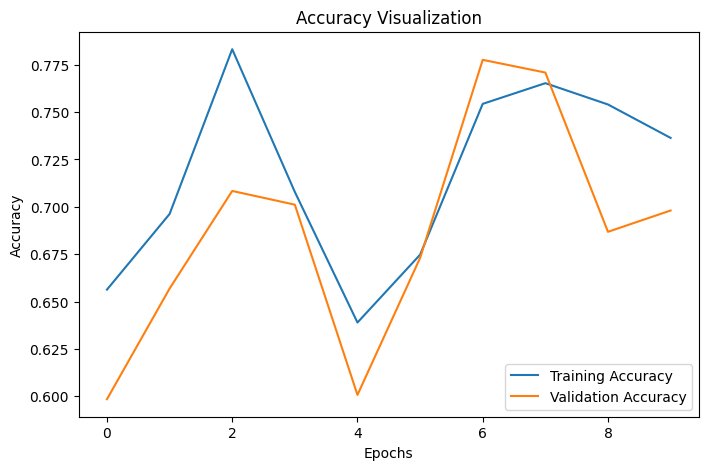

In [14]:
plt.figure(figsize=(8,5))
plt.plot(model.history.history["accuracy"],label="Training Accuracy")
plt.plot(model.history.history["val_accuracy"],label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Visualization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()